In [42]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
df_2023 = pd.read_csv('../T100D_SEGMENT_US_CARRIER_2023.csv')
df_2023.head()

/var/folders/qz/n2_fh26j4sq9p69l7t8bkvnw0000gn/T/ipykernel_27943/3759792646.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv('../T100D_SEGMENT_US_CARRIER_2023.csv')


DEPARTURES_SCHEDULED  DEPARTURES_PERFORMED  PAYLOAD  SEATS  PASSENGERS  \
0                   0.0                   0.0      0.0    0.0         0.0   
1                   0.0                   0.0      0.0    0.0         0.0   
2                   0.0                   0.0      0.0    0.0         0.0   
3                   0.0                   0.0      0.0    0.0         0.0   
4                   0.0                   0.0      0.0    0.0         0.0   

   FREIGHT  MAIL  DISTANCE  RAMP_TO_RAMP  AIR_TIME  ...  DEST_STATE_NM  \
0      0.0   0.0       0.0           0.0       0.0  ...   Pennsylvania   
1      0.0   0.0      16.0           0.0       0.0  ...  Massachusetts   
2      0.0   0.0      17.0           0.0       0.0  ...     California   
3      0.0   0.0      17.0           0.0       0.0  ...   Rhode Island   
4      0.0   0.0      17.0           0.0       0.0  ...   Rhode Island   

   DEST_WAC AIRCRAFT_GROUP AIRCRAFT_TYPE AIRCRAFT_CONFIG  YEAR QUARTER  MONTH  \
0        23              6           626               2  2023       3      8   
1        13              6           622               1  2023       4     10   
2        91              6           622               1  2023       4     10   
3        15              0            79               1  2023       1      1   
4        15              0            79               1  2023       2      5   

   DISTANCE_GROUP  CLASS  
0               1      G  
1               1      L  
2               1      L  
3               1      F  
4               1      F  

[5 rows x 45 columns]

In [3]:
df_2024 = pd.read_csv('../T100D_SEGMENT_US_CARRIER_2024.csv')
df_2024.head()

/var/folders/qz/n2_fh26j4sq9p69l7t8bkvnw0000gn/T/ipykernel_27943/565770301.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2024 = pd.read_csv('../T100D_SEGMENT_US_CARRIER_2024.csv')


DEPARTURES_SCHEDULED  DEPARTURES_PERFORMED  PAYLOAD  SEATS  PASSENGERS  \
0                   0.0                   0.0      0.0    0.0         0.0   
1                   0.0                   0.0      0.0    0.0         0.0   
2                   0.0                   0.0      0.0    0.0         0.0   
3                   0.0                   0.0      0.0    0.0         0.0   
4                   0.0                   0.0      0.0    0.0         0.0   

   FREIGHT  MAIL  DISTANCE  RAMP_TO_RAMP  AIR_TIME  ... DEST_STATE_NM  \
0      0.0   0.0      15.0           0.0       0.0  ...      Illinois   
1      0.0   0.0      17.0           0.0       0.0  ...  Rhode Island   
2      0.0   0.0      17.0           0.0       0.0  ...  Rhode Island   
3      0.0   0.0      17.0           0.0       0.0  ...  Rhode Island   
4      0.0   0.0      17.0           0.0       0.0  ...  Rhode Island   

   DEST_WAC AIRCRAFT_GROUP AIRCRAFT_TYPE AIRCRAFT_CONFIG  YEAR QUARTER  MONTH  \
0        41              6           622               1  2024       4     10   
1        15              0            79               1  2024       1      1   
2        15              0            79               1  2024       3      7   
3        15              0            79               1  2024       3      8   
4        15              0            79               1  2024       4     12   

   DISTANCE_GROUP  CLASS  
0               1      L  
1               1      F  
2               1      F  
3               1      F  
4               1      F  

[5 rows x 45 columns]

In [5]:
df_2023.columns

Index(['DEPARTURES_SCHEDULED', 'DEPARTURES_PERFORMED', 'PAYLOAD', 'SEATS',
       'PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE', 'RAMP_TO_RAMP', 'AIR_TIME',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'UNIQUE_CARRIER_NAME',
       'UNIQUE_CARRIER_ENTITY', 'REGION', 'CARRIER', 'CARRIER_NAME',
       'CARRIER_GROUP', 'CARRIER_GROUP_NEW', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'AIRCRAFT_GROUP', 'AIRCRAFT_TYPE', 'AIRCRAFT_CONFIG', 'YEAR', 'QUARTER',
       'MONTH', 'DISTANCE_GROUP', 'CLASS'],
      dtype='object')

# df_2023 Centralities

In [97]:
# Create a directed graph
def build_graph(df):
    G = nx.DiGraph()
    for _, row in df.iterrows():
        origin, dest = row["ORIGIN"], row["DEST"]
        weight = row["DEPARTURES_PERFORMED"]
        if G.has_edge(origin, dest):
            G[origin][dest]["weight"] += weight
        else:
            G.add_edge(origin, dest, weight=weight)
    return G

In [100]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_2023, k=0.15)
nx.draw(G_2023, pos, node_size=20, edge_color='gray', alpha=0.5)
# nx.draw_networkx_nodes(G_2023, pos, nodelist=degree_centrality_df["Airport"].head(10), node_color='red', node_size=100)
plt.title("Air Traffic Network Graph (Top 10 by Degree Airports Highlighted)")
plt.savefig('plots/air traffic')
plt.close()
plt.show()

In [134]:
# Build graph from 2023 data
G_2023 = build_graph(df_2023)

# Compute centrality measures
degree_centrality = nx.degree_centrality(G_2023)
betweenness_centrality = nx.betweenness_centrality(G_2023, weight='weight')
eigenvector_centrality = nx.eigenvector_centrality(G_2023, max_iter=1000)

# Convert centrality measures to DataFrame
centrality_df = pd.DataFrame({
    "Airport": list(degree_centrality.keys()),
    "Degree Centrality": list(degree_centrality.values()),
    "Betweenness Centrality": list(betweenness_centrality.values()),
    "Eigenvector Centrality": list(eigenvector_centrality.values())
})

# Sort by importance
degree_centrality_df = centrality_df.sort_values(by="Degree Centrality", ascending=False)
print(degree_centrality_df.head(10))  # Display top 10 busiest airports

# Visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_2023, k=0.15)
nx.draw(G_2023, pos, node_size=20, edge_color='gray', alpha=0.5)
nx.draw_networkx_nodes(G_2023, pos, nodelist=degree_centrality_df["Airport"].head(10), node_color='red', node_size=100)
plt.title("Air Traffic Network Graph (Top 10 by Degree Airports Highlighted)")
plt.savefig('plots/Air Traffic Network Graph (Top 10 by Degree Airports Highlighted)')
plt.close()
plt.show()

    Airport  Degree Centrality  Betweenness Centrality  Eigenvector Centrality
44      ORD           0.353289                0.008868                0.125656
83      DEN           0.346637                0.007039                0.117778
48      LAS           0.342203                0.010484                0.116284
33      HPN           0.340724                0.055119                0.093708
569     DFW           0.328899                0.004990                0.122758
243     ANC           0.327421                0.249469                0.045304
46      MSP           0.321508                0.004115                0.117343
30      ATL           0.319290                0.048268                0.123908
301     TEB           0.318551                0.040383                0.081064
77      BNA           0.316334                0.017816                0.119991


In [143]:
total_weight = [data["weight"] for _, _, data in G_2023.edges(data=True)]
num_edges = G_2023.number_of_edges()
# average_weight = total_weight / num_edges if num_edges > 0 else 0
np.min(total_weight)
# average_weight

0.0

In [118]:
avg_in_degree = sum(dict(G_2023.in_degree()).values()) / G_2023.number_of_nodes()
avg_out_degree = sum(dict(G_2023.out_degree()).values()) / G_2023.number_of_nodes()
avg_in_degree, avg_out_degree

(22.772525849335302, 22.772525849335302)

In [121]:
n = G_2023.number_of_nodes()
p = 22.77 / 1353

In [129]:
p

0.016829268292682928

In [124]:
G_er_2023 = nx.erdos_renyi_graph(n, p, directed=True)

In [130]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_er_2023, k=0.15)
nx.draw(G_er_2023, pos, node_size=20, edge_color='gray', alpha=0.5)
plt.savefig('plots/air traffic er')
plt.close()
plt.show()

In [126]:
# Compute centrality measures
degree_centrality = nx.degree_centrality(G_er_2023)
betweenness_centrality = nx.betweenness_centrality(G_er_2023, weight='weight')
eigenvector_centrality = nx.eigenvector_centrality(G_er_2023, max_iter=1000)

# Convert centrality measures to DataFrame
er_centrality_df = pd.DataFrame({
    "Airport": list(degree_centrality.keys()),
    "Degree Centrality": list(degree_centrality.values()),
    "Betweenness Centrality": list(betweenness_centrality.values()),
    "Eigenvector Centrality": list(eigenvector_centrality.values())
})

er_degree_centrality_df = er_centrality_df.sort_values(by="Degree Centrality", ascending=False)
print(er_degree_centrality_df.head(10))

      Airport  Degree Centrality  Betweenness Centrality  \
1039     1039           0.055432                0.003080   
334       334           0.049520                0.002768   
1150     1150           0.048780                0.002559   
1304     1304           0.048041                0.002534   
1178     1178           0.048041                0.002659   
0           0           0.046563                0.002383   
688       688           0.046563                0.002402   
124       124           0.045824                0.002246   
18         18           0.045085                0.002156   
744       744           0.045085                0.002114   

      Eigenvector Centrality  
1039                0.049992  
334                 0.035501  
1150                0.040198  
1304                0.036541  
1178                0.039607  
0                   0.040849  
688                 0.041525  
124                 0.029939  
18                  0.040882  
744                 0.030126 

In [135]:
centrality_df.describe()

Degree Centrality  Betweenness Centrality  Eigenvector Centrality
count        1354.000000             1354.000000            1.354000e+03
mean            0.033662                0.002265            1.230745e-02
std             0.058649                0.008634            2.423867e-02
min             0.000739                0.000000            6.485359e-20
25%             0.002956                0.000003            4.170709e-04
50%             0.009608                0.000239            1.394635e-03
75%             0.032520                0.001562            9.229302e-03
max             0.353289                0.249469            1.256556e-01

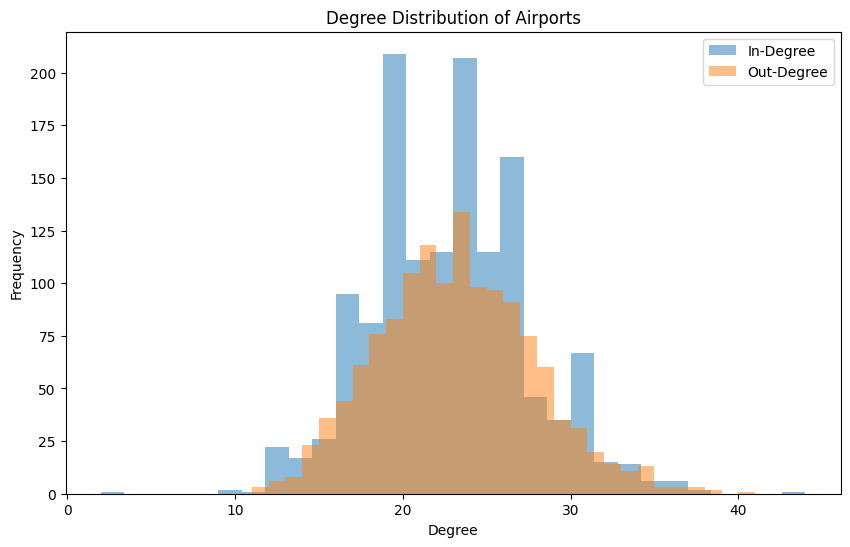

In [127]:
# Degree Distribution
in_degrees = [G_er_2023.in_degree(n) for n in G_er_2023.nodes()]
out_degrees = [G_er_2023.out_degree(n) for n in G_er_2023.nodes()]
plt.figure(figsize=(10, 6))
plt.hist(in_degrees, bins=30, alpha=0.5, label='In-Degree')
plt.hist(out_degrees, bins=30, alpha=0.5, label='Out-Degree')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Airports")
plt.legend()
plt.show()

In [128]:
avg_in_degree = sum(dict(G_er_2023.in_degree()).values()) / G_er_2023.number_of_nodes()
avg_out_degree = sum(dict(G_er_2023.out_degree()).values()) / G_er_2023.number_of_nodes()
avg_in_degree, avg_out_degree

(22.691285081240768, 22.691285081240768)

In [74]:
betweenness_centrality_df = centrality_df.sort_values(by="Betweenness Centrality", ascending=False)
print(betweenness_centrality_df.head(10))  # Display top 10 busiest airports
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_2023, k=0.15)
nx.draw(G_2023, pos, node_size=20, edge_color='gray', alpha=0.5)
nx.draw_networkx_nodes(G_2023, pos, nodelist=betweenness_centrality_df["Airport"].head(10), node_color='red', node_size=100)
plt.title("Air Traffic Network Graph (Top 10 by Betweenness Airports Highlighted)")
plt.savefig('plots/Air Traffic Network Graph (Top 10 by Betweenness Airports Highlighted)')
plt.close()
plt.show()

    Airport  Degree Centrality  Betweenness Centrality  Eigenvector Centrality
243     ANC           0.327421                0.249469                0.045304
106     FAI           0.152254                0.062739                0.009445
33      HPN           0.340724                0.055119                0.093708
94      BFI           0.209904                0.054821                0.073227
30      ATL           0.319290                0.048268                0.123908
51      DTW           0.254989                0.046884                0.102001
43      SAV           0.141907                0.045803                0.066582
301     TEB           0.318551                0.040383                0.081064
36      OKC           0.214339                0.037046                0.100952
98      RIV           0.034738                0.032434                0.013119


# Average Path Length

In [14]:
def average_path_length(G):
    if nx.is_strongly_connected(G):
        return nx.average_shortest_path_length(G, weight='weight')
    else:
        total_length = 0
        count = 0
        for component in nx.strongly_connected_components(G):
            subgraph = G.subgraph(component)
            if len(subgraph) > 1:  # Ignore isolated nodes
                total_length += nx.average_shortest_path_length(subgraph, weight='weight')
                count += 1
        return total_length / count if count > 0 else float('inf')

In [15]:
print("Average path length:", average_path_length(G_2023))

Average path length: 508.6315791800839


# N(t) and L(t) Animation

In [76]:
def build_graph(df, month):
    G = nx.DiGraph()
    monthly_df = df[df['MONTH'] == month]
    
    for _, row in monthly_df.iterrows():
        origin, dest = row['ORIGIN'], row['DEST']
        weight = row['DEPARTURES_PERFORMED']
        if G.has_edge(origin, dest):
            G[origin][dest]['weight'] += weight
        else:
            G.add_edge(origin, dest, weight=weight)
    return G

In [81]:
!ffmpeg -version

zsh:1: command not found: ffmpeg


# df_2023 Clustering Coefficient

In [62]:
def directed_clustering_coefficient(G):
    clustering = {}
    
    for node in G.nodes():
        neighbors = set(G.predecessors(node)) | set(G.successors(node))
        if len(neighbors) < 2:
            clustering[node] = 0.0
            continue
        
        possible_triads = len(neighbors) * (len(neighbors) - 1)
        actual_triads = 0
        
        for u in neighbors:
            for v in neighbors:
                if u != v and (G.has_edge(u, v) or G.has_edge(v, u)):
                    actual_triads += 1
        
        clustering[node] = actual_triads / possible_triads
    
    return clustering

clustering_coefficients = directed_clustering_coefficient(G_2023)
print(clustering_coefficients)

{'PHL': 0.32864538746891686, 'BED': 0.2949741315594974, 'BOS': 0.35056887986752844, 'LGB': 0.5093795093795094, 'LAX': 0.2920783376111951, 'BID': 0.55, 'WST': 0.4666666666666667, 'SNA': 0.34804597701149426, 'GDV': 1.0, 'SDY': 1.0, 'GGW': 0.6666666666666666, 'OLF': 1.0, 'MTJ': 0.5683080340614587, 'GUC': 0.6405228758169934, 'STX': 0.8181818181818182, 'VQS': 0.8, 'STL': 0.3965269392214364, 'UIN': 0.2777777777777778, 'SJU': 0.5151315789473684, 'PWM': 0.4710269650028686, 'CLE': 0.5088383838383839, 'PIT': 0.4286647659776669, 'SAN': 0.419811320754717, 'CMH': 0.40979712378017463, 'SBN': 0.45106861642294716, 'LAN': 0.5698778833107191, 'COS': 0.36119733924611974, 'RDU': 0.41410135770936957, 'CLT': 0.3445723313021891, 'TYS': 0.4429583631876443, 'ATL': 0.34061053888640097, 'PHX': 0.33533834586466166, 'YUM': 0.5780730897009967, 'HPN': 0.1820836098208361, 'MVY': 0.32474849094567404, 'JFK': 0.39482961222091656, 'OKC': 0.40689697043288203, 'DAL': 0.33299595141700405, 'BWI': 0.3762311557788945, 'ACK': 0

In [65]:
top_clusters = sorted(clustering_coefficients.items(), key=lambda x: x[1], reverse=True)[:10]
top_clusters

[('GDV', 1.0),
 ('SDY', 1.0),
 ('OLF', 1.0),
 ('EXI', 1.0),
 ('BNF', 1.0),
 ('PBK', 1.0),
 ('06A', 1.0),
 ('A70', 1.0),
 ('JLA', 1.0),
 ('PUL', 1.0)]

# df_2023 Degree Distribution

In [95]:
# Degree Distribution
in_degrees = [G_2023.in_degree(n) for n in G_2023.nodes()]
out_degrees = [G_2023.out_degree(n) for n in G_2023.nodes()]
plt.figure(figsize=(10, 6))
plt.hist(in_degrees, bins=30, alpha=0.5, label='In-Degree')
plt.hist(out_degrees, bins=30, alpha=0.5, label='Out-Degree')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Airports")
plt.legend()
plt.savefig('plots/airport degree distribution')
plt.close()
plt.show()

# df_2023 Busiest Airports

In [92]:
# Air Traffic Congestion Analysis
congestion_df = df_2023.groupby("ORIGIN")["DEPARTURES_PERFORMED"].sum().reset_index()
congestion_df = congestion_df.sort_values(by="DEPARTURES_PERFORMED", ascending=False)
print(congestion_df.head(10))  # Display top 10 most congested airports

# Plot congestion
plt.figure(figsize=(12, 6))
plt.bar(congestion_df["ORIGIN"].head(10), congestion_df["DEPARTURES_PERFORMED"].head(10), color='orange')
plt.xlabel("Airport")
plt.ylabel("Total Departures Performed")
plt.title("Top 10 Most Congested Airports")
plt.xticks(rotation=45)
plt.savefig('plots/Top10 2023 by departures performed')
plt.close()
plt.show()

     ORIGIN  DEPARTURES_PERFORMED
110     ATL              340777.0
295     DEN              307829.0
900     ORD              303032.0
297     DFW              297107.0
247     CLT              229492.0
651     LAX              206864.0
649     LAS              202590.0
944     PHX              194252.0
1071    SEA              188092.0
727     MCO              173227.0


# df_2023 Congestion Visualization by DEPARTURES_PERFORMED

In [101]:
# Visualize Congestion in NetworkX
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_2023, k=0.15)
nx.draw(G_2023, pos, node_size=20, edge_color='gray', alpha=0.5)
nx.draw_networkx_nodes(G_2023, pos, nodelist=congestion_df["ORIGIN"].head(10).tolist(), node_color='red', node_size=150)
# nx.draw_networkx_labels(G_2023, pos, labels={airport: airport for airport in congestion_df["ORIGIN"].head(10)}, font_size=8)
plt.title("Air Traffic Network Graph (Top 10 Most Congested Airports Highlighted in Blue)")
plt.savefig('plots/Air Traffic Network Graph (Top 10 by departures)')
plt.close()
plt.show()

# df_2023 Congestion Visualization by DEPARTURES_PERFORMED (TOP-10)

In [96]:
# Zoomed-in visualization for most congested airports
subgraph_nodes = congestion_df["ORIGIN"].head(10).tolist()
subG = G_2023.subgraph(subgraph_nodes)
plt.figure(figsize=(8, 6))
pos_sub = nx.spring_layout(subG, k=0.2)
nx.draw(subG, pos_sub, node_size=300, node_color='blue', edge_color='gray', alpha=0.7, with_labels=True)
edge_labels_sub = {(u, v): f'{subG[u][v]["weight"]}' for u, v in subG.edges()}
nx.draw_networkx_edge_labels(subG, pos_sub, edge_labels=edge_labels_sub, font_size=8)
plt.title("Zoomed-In View: Top 10 Most Congested Airports (Edge Width Represents Traffic Volume)")
plt.savefig('plots/zoomed-in Top10 2023 by departures performed')
plt.close()
plt.show()

# df_2024 Centralities

    Airport  Degree Centrality  Betweenness Centrality  Eigenvector Centrality
0       ORD           0.362694                0.010473                0.125554
40      DEN           0.344189                0.021774                0.118600
38      MSP           0.339008                0.012565                0.120491
637     DFW           0.329386                0.010042                0.123611
27      LAS           0.319763                0.009320                0.115234
25      ATL           0.316062                0.005336                0.122428
87      ANC           0.314582                0.213998                0.045676
9       HPN           0.310141                0.041476                0.085108
215     TEB           0.306440                0.049282                0.072602
21      BNA           0.301999                0.011633                0.121876


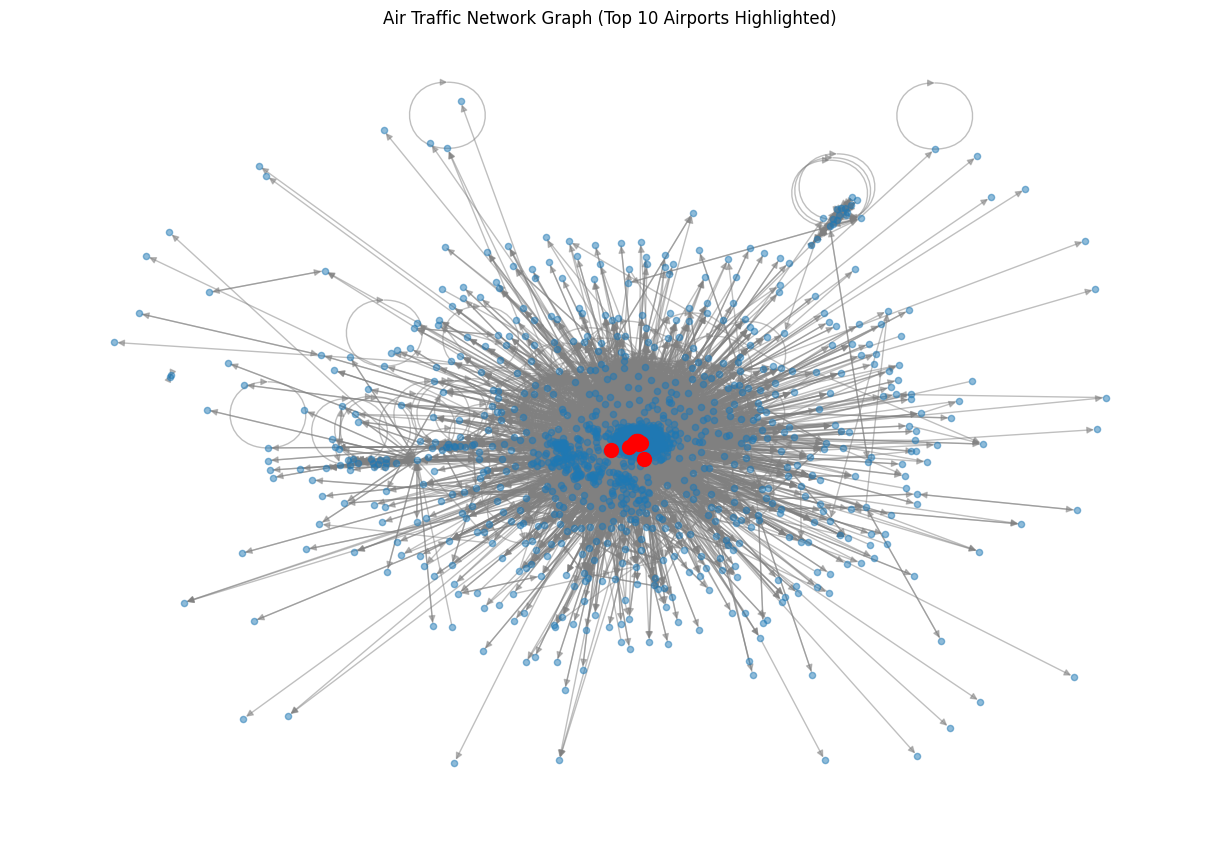

In [91]:
# Create a directed graph
G_2024 = build_graph(df_2024)

# Compute centrality measures
degree_centrality = nx.degree_centrality(G_2024)
betweenness_centrality = nx.betweenness_centrality(G_2024, weight='weight')
eigenvector_centrality = nx.eigenvector_centrality(G_2024, max_iter=1000)

# Convert centrality measures to DataFrame
centrality_df = pd.DataFrame({
    "Airport": list(degree_centrality.keys()),
    "Degree Centrality": list(degree_centrality.values()),
    "Betweenness Centrality": list(betweenness_centrality.values()),
    "Eigenvector Centrality": list(eigenvector_centrality.values())
})

# Sort by importance
degree_centrality_df = centrality_df.sort_values(by="Degree Centrality", ascending=False)
print(degree_centrality_df.head(10))  # Display top 10 busiest airports

# Visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_2024, k=0.15)
nx.draw(G_2024, pos, node_size=20, edge_color='gray', alpha=0.5)
nx.draw_networkx_nodes(G_2024, pos, nodelist=degree_centrality_df["Airport"].head(10), node_color='red', node_size=100)
plt.title("Air Traffic Network Graph (Top 10 Airports Highlighted)")
plt.show()

Processing month: 1
Number of nodes: 79, Number of edges: 79
{('SAN', 'SLC'), ('SAN', 'DEN'), ('SAN', 'OAK'), ('SAN', 'PHX'), ('SAN', 'SEA'), ('SAN', 'DFW'), ('SAN', 'SJC'), ('SAN', 'LAS'), ('SAN', 'SMF'), ('SAN', 'SFO')}
Processing month: 1
Number of nodes: 79, Number of edges: 79
{('SAN', 'SLC'), ('SAN', 'DEN'), ('SAN', 'OAK'), ('SAN', 'PHX'), ('SAN', 'SEA'), ('SAN', 'DFW'), ('SAN', 'SJC'), ('SAN', 'LAS'), ('SAN', 'SMF'), ('SAN', 'SFO')}
Processing month: 2
Number of nodes: 75, Number of edges: 75
{('SAN', 'SLC'), ('SAN', 'DEN'), ('SAN', 'OAK'), ('SAN', 'PHX'), ('SAN', 'SEA'), ('SAN', 'DFW'), ('SAN', 'SJC'), ('SAN', 'LAS'), ('SAN', 'SMF'), ('SAN', 'SFO')}
Processing month: 3
Number of nodes: 77, Number of edges: 76
{('SAN', 'SLC'), ('SAN', 'DEN'), ('SAN', 'OAK'), ('SAN', 'PHX'), ('SAN', 'SEA'), ('SAN', 'DFW'), ('SAN', 'SJC'), ('SAN', 'LAS'), ('SAN', 'SMF'), ('SAN', 'SFO')}
Processing month: 4
Number of nodes: 73, Number of edges: 73
{('SAN', 'DEN'), ('SAN', 'OAK'), ('SAN', 'PHX'), ('

Processing month: 1
Number of nodes: 79, Number of edges: 79
{('SAN', 'SLC'), ('SAN', 'DEN'), ('SAN', 'OAK'), ('SAN', 'PHX'), ('SAN', 'SEA'), ('SAN', 'DFW'), ('SAN', 'SJC'), ('SAN', 'LAS'), ('SAN', 'SMF'), ('SAN', 'SFO')}


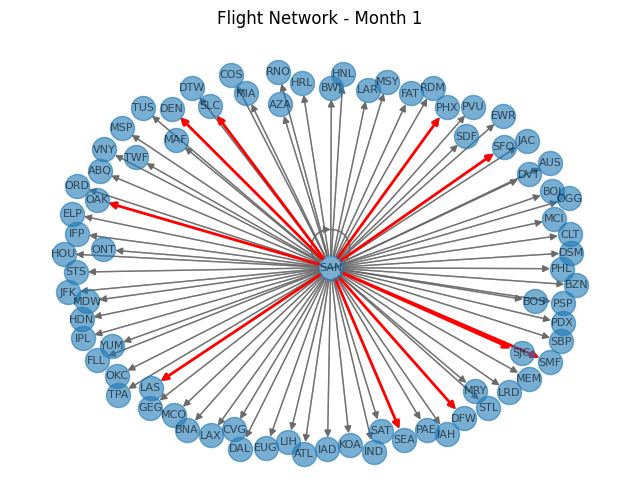

In [61]:
SAN_airport = df_2024[df_2024['ORIGIN'] == 'SAN']
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Network Evolution Over Time")

def update(month):
    ax.clear()
    print(f"Processing month: {month}")  # Debugging print
    G = build_graph(SAN_airport, month)
    print(f"Number of nodes: {len(G.nodes())}, Number of edges: {len(G.edges())}")  # Debugging print
    ax.set_title(f"Flight Network - Month {month}")
    # Get edge weights
    edge_weights = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    # Sort edges by weight and get the top 10
    top_edges = sorted(edge_weights.items(), key=lambda x: x[1], reverse=True)[:10]
    top_edges_set = set([edge[0] for edge in top_edges])  # Convert to set for quick lookup
    print(top_edges_set)
    # Positioning nodes
    pos = nx.spring_layout(G, seed=42)
    # Draw nodes
    nx.draw(G, pos, ax=ax, with_labels=True, node_size=300, alpha=0.6, font_size=8)
    # Draw all edges in gray
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color='gray', alpha=0.5, arrows=True)
    # Highlight top 10 edges in red
    nx.draw_networkx_edges(G, pos, edgelist=top_edges_set, ax=ax, edge_color='red', width=2, arrows=True)

ani = animation.FuncAnimation(fig, update, frames=months, repeat=True, interval=1000)
from IPython.display import HTML
HTML(ani.to_jshtml())

# Average Path Length

In [16]:
print("Average path length:", average_path_length(G_2024))

Average path length: 141.01377553424715


# df_2024 Degree Distribution

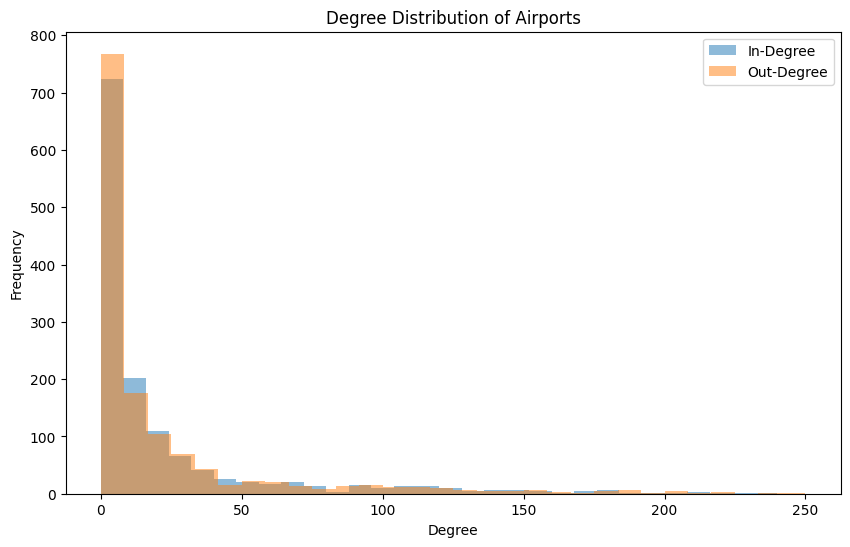

In [10]:
# Degree Distribution
in_degrees = [G_2024.in_degree(n) for n in G_2024.nodes()]
out_degrees = [G_2024.out_degree(n) for n in G_2024.nodes()]
plt.figure(figsize=(10, 6))
plt.hist(in_degrees, bins=30, alpha=0.5, label='In-Degree')
plt.hist(out_degrees, bins=30, alpha=0.5, label='Out-Degree')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Airports")
plt.legend()
plt.show()

# df_2024 Busiest Airports

     ORIGIN  DEPARTURES_PERFORMED
114     ATL              345209.0
896     ORD              328086.0
300     DEN              321994.0
302     DFW              320463.0
248     CLT              255929.0
943     PHX              208622.0
648     LAX              206637.0
646     LAS              202584.0
1075    SEA              191107.0
527     IAH              170715.0


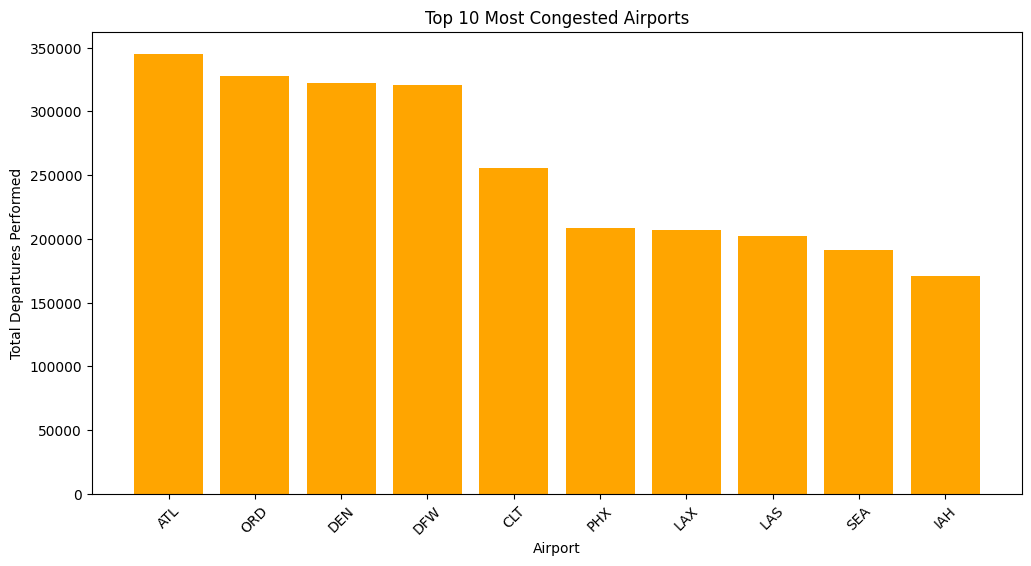

In [11]:
# Air Traffic Congestion Analysis
congestion_df = df_2024.groupby("ORIGIN")["DEPARTURES_PERFORMED"].sum().reset_index()
congestion_df = congestion_df.sort_values(by="DEPARTURES_PERFORMED", ascending=False)
print(congestion_df.head(10))  # Display top 10 most congested airports

# Plot congestion
plt.figure(figsize=(12, 6))
plt.bar(congestion_df["ORIGIN"].head(10), congestion_df["DEPARTURES_PERFORMED"].head(10), color='orange')
plt.xlabel("Airport")
plt.ylabel("Total Departures Performed")
plt.title("Top 10 Most Congested Airports")
plt.xticks(rotation=45)
plt.show()

# df_2024 Congestion Visualization by DEPARTURES_PERFORMED

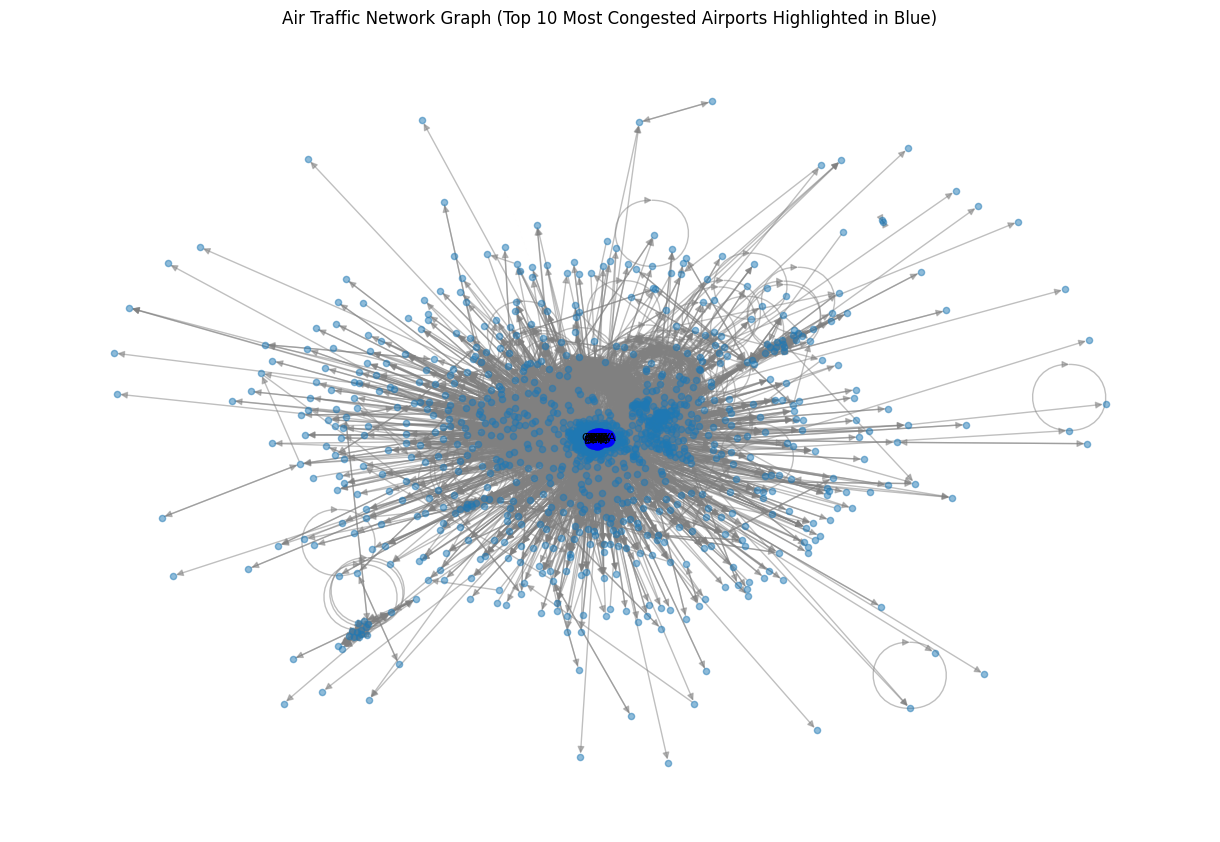

In [12]:
# Visualize Congestion in NetworkX
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_2024, k=0.15)
nx.draw(G_2024, pos, node_size=20, edge_color='gray', alpha=0.5)
nx.draw_networkx_nodes(G_2024, pos, nodelist=congestion_df["ORIGIN"].head(10).tolist(), node_color='blue', node_size=150)
nx.draw_networkx_labels(G_2024, pos, labels={airport: airport for airport in congestion_df["ORIGIN"].head(10)}, font_size=8)
plt.title("Air Traffic Network Graph (Top 10 Most Congested Airports Highlighted in Blue)")
plt.show()

# df_2024 Congestion Visualization by DEPARTURES_PERFORMED (TOP-10)

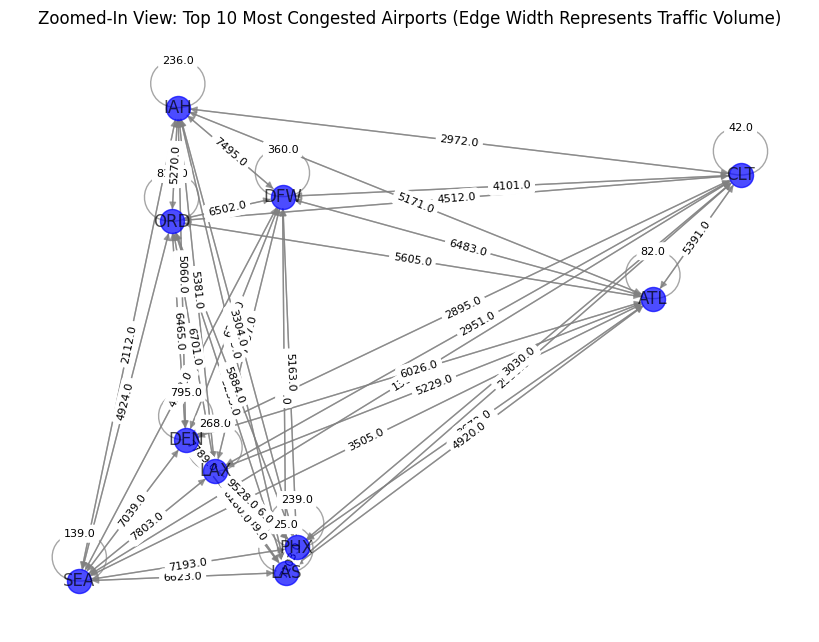

In [13]:
# Zoomed-in visualization for most congested airports
subgraph_nodes = congestion_df["ORIGIN"].head(10).tolist()
subG = G_2024.subgraph(subgraph_nodes)
plt.figure(figsize=(8, 6))
pos_sub = nx.spring_layout(subG, k=0.2)
nx.draw(subG, pos_sub, node_size=300, node_color='blue', edge_color='gray', alpha=0.7, with_labels=True)
edge_labels_sub = {(u, v): f'{subG[u][v]["weight"]}' for u, v in subG.edges()}
nx.draw_networkx_edge_labels(subG, pos_sub, edge_labels=edge_labels_sub, font_size=8)
plt.title("Zoomed-In View: Top 10 Most Congested Airports (Edge Width Represents Traffic Volume)")
plt.show()